In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

On charge la donnée: le fichier doit se trouver dans le même répertoire que le notebook. Autrement il faut adapter le chemin dans la chaine de caractère que l'on donne à la fonction `np.load` de numpy.

In [2]:
# Load data
data = np.load("toy_data.npz")
x = data["x"]
y = data["y"]
xt = data["xt"]
yt = data["yt"]

Maintenant que l'on chargé les données, on va itérer sur la valeur degrée de la transformation polynomiale que l'on veut effectuer avant la régression linéaire. On visualise la fonction estimée en traçant ses predictions dans l'intervale $[-6, 6]$

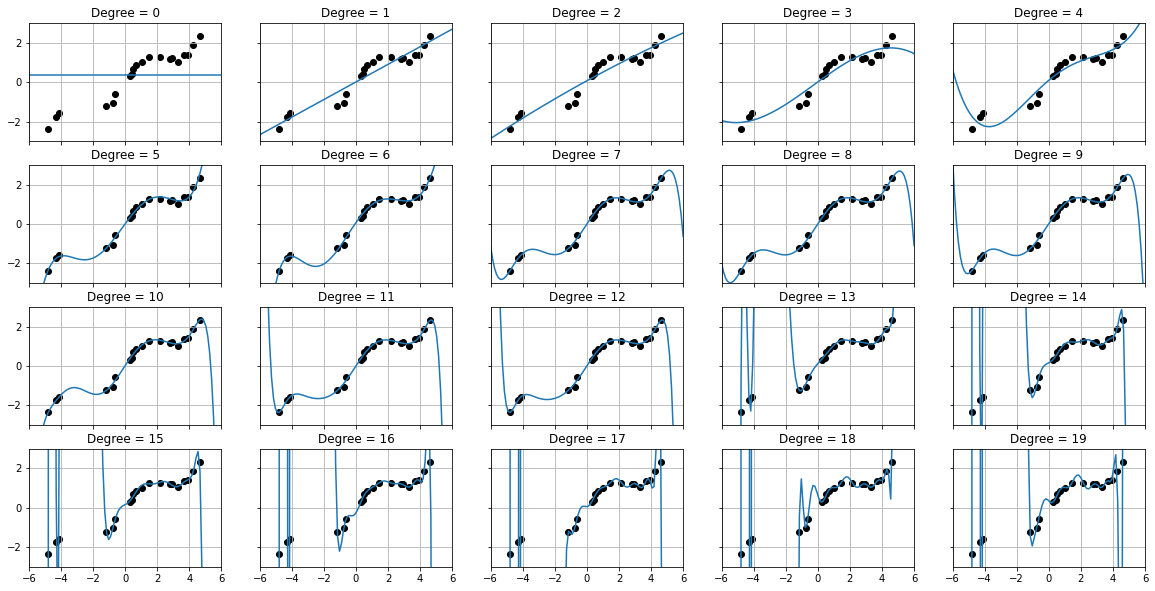

In [14]:
mse_train, mse_test = [], []
fig, axs = plt.subplots(nrows=4, ncols=5, sharex=True, sharey=True,
                       figsize=(20,10))
t = np.linspace(-6, 6, 100).reshape(-1, 1)
for degree, ax in zip(range(20),
                      fig.axes):
    # Init model
    model = make_pipeline(PolynomialFeatures(degree),
                          LinearRegression())
    
    # Fit model on the training set
    model.fit(x, y)
    
    # Predict sample for the training and testing set respectively
    y_pred_train = model.predict(x)
    y_pred_test = model.predict(xt)
    mse_train.append(MSE(y, y_pred_train))
    mse_test.append(MSE(yt, y_pred_test))
    
    # Plot the fitted function between [-6, 6]
    ax.scatter(x, y, c='k')
    ax.plot(t, model.predict(t))
    ax.set_ylim(-3, 3)
    ax.set_xlim(-6, 6)
    ax.grid("on")
    ax.set_title(f"Degree = {degree}")

On voit nettement que les predictions de dégrade pour un `degree` supérieur à 13. En traçant la MSE calculée sur le jeux de test/train, on voit que les résultats se dégrade un avant. Pour s'affranchir des problèmes de d'échelles on va tracer les courbes avec une échelles logarithmiques (tiré de l'aide en ligne: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/fahrenheit_celsius_scales.html).

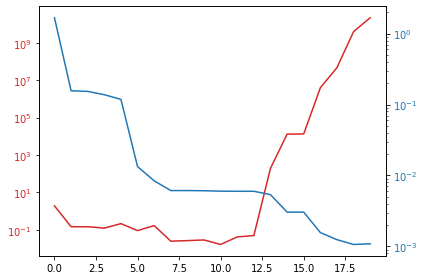

In [17]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.semilogy(range(20), mse_test, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.semilogy(range(20), mse_train, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 

On voit que l'erreur calculée sur le jeu d'entrainement ne fait que dimimuer au fur et a mesure que l'on augmente le degree du polynome, alors que l'erreur calculée sur les données de test diminue jusqu'à un certain point, puis augmente de façon signicative. On est alors dans du sur-apprentissage: nous avons appris le bruit de la donnée, plus que la relation existante entre les données d'entrée et de sortie. Pour cette exemple, le degree optimal est trouvé par la commande suivante:

In [18]:
np.argmin(mse_test)

10

In [21]:
model.steps[1][1].coef_

array([[ 0.00000000e+00, -8.54569920e-01,  1.47183105e-01,
         9.77560272e+00, -4.49681616e+00, -1.63999944e+01,
         1.00637699e+01,  1.18481086e+01, -1.05855758e+01,
        -1.93048125e+00,  4.40500660e+00, -1.16860762e+00,
        -2.90055711e-01,  1.82582411e-01, -1.26930523e-02,
        -7.86691289e-03,  1.53781723e-03,  4.50344004e-05,
        -3.31885613e-05,  2.30706528e-06]])